# DNN-LSTM-and-ARIMA-for-Supply-Chain

###  1) Deep Learning based delivery date prediction

###  2) LSTM based Freight cost prediction

###  3) ARIMA based Freight cost prediction

**Description:**

The objective of the project is to obtain the prediction of delivery date and freight cost based on the historic trend and attributes.The notebook showcases the exploratory data analysis and Deep learning model for delivery date prediction as well as LSTM model for freight cost prediction.

The supply chain shipment data is available free of charge at the following links  https://www.ncdc.noaa.gov/cdo-web and https://www.usaid.gov/opengov/developer/datasets/SCMS_Delivery_History_Dataset_20150929.csv.

**Methodology:**
1. Loading required libraries
2. Data loading
3. Feature engineering and Exploratory Data analysis
4. Deep Learning Model for Delivery Date Prediction
5. LSTM based Freight Cost Prediction
6. Result Discussion

**Requirements:** This project requires **Python 3.6** and the following Python libraries installed:

- [NumPy](http://www.numpy.org/)
- [Pandas](http://pandas.pydata.org)
- [matplotlib](http://matplotlib.org/)
- [Seaborn](https://seaborn.pydata.org/)
- [XGBoost](https://github.com/dmlc/xgboost)
- [scikit-learn](http://scikit-learn.org/stable/)
- [DateTime](https://docs.python.org/2/library/datetime.html)
- [Keras](https://keras.io/)
- [TensorFlow](https://www.tensorflow.org/)

You will also need to have software installed to run and execute a [Jupyter Notebook](http://ipython.org/notebook.html)

If you do not have Python installed yet, it is highly recommended that you install the [Anaconda](http://continuum.io/downloads) distribution of Python, which already has the above packages and more included.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn
import datetime
import seaborn as sns
%matplotlib inline

In [2]:
import tensorflow as tf

## Data Read into dataframe df

In [3]:
def read_csv(filepath):
     if os.path.splitext(filepath)[1] != '.csv':
          return  # or whatever
     seps = [',', ';', '\t']                    # ',' is default
     encodings = [None, 'utf-8', 'ISO-8859-1']  # None is default
     for sep in seps:
         for encoding in encodings:
              try:
                  return pd.read_csv(filepath, encoding=encoding, sep=sep)
              except Exception:  # should really be more specific
                  pass
     raise ValueError("{!r} is has no encoding in {} or seperator in {}"
                      .format(filepath, encodings, seps))

In [4]:
df = read_csv('/content/SCMS_Delivery_History_Dataset.csv')

## Exploratory Data Analysis

In [5]:
df

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [7]:
df.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


<Axes: xlabel='Country'>

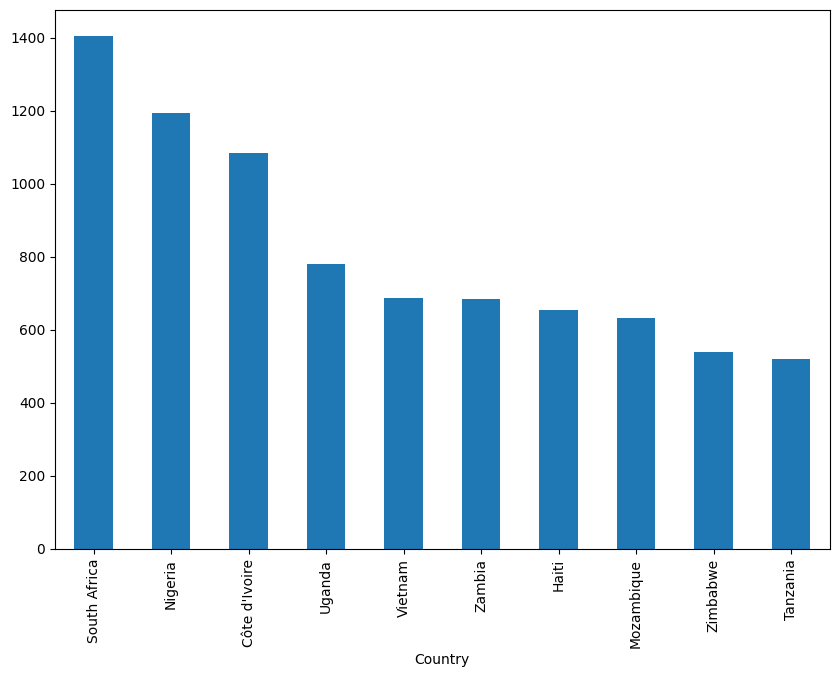

In [8]:
country = df['Country'].value_counts().head(10)
fig, ax = plt.subplots(figsize=(10,7))
country.plot.bar(ax=ax)

The plot above shows that the maximum orders are for Africa.

In [9]:
df['Shipment Mode'].value_counts()

Shipment Mode
Air            6113
Truck          2830
Air Charter     650
Ocean           371
Name: count, dtype: int64

In [10]:
df['Fulfill Via'].value_counts()

Fulfill Via
From RDC       5404
Direct Drop    4920
Name: count, dtype: int64

In [11]:
df.isna().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [12]:
df.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


In [13]:
# Convert Date fields to DateTime data type
df['PQ First Sent to Client Date'] = pd.to_datetime(df[df['PQ First Sent to Client Date']!='NA']\
                                ['PQ First Sent to Client Date'],errors='coerce',format='%m/%d/%Y')

df['PO Sent to Vendor Date'] = pd.to_datetime(df[df['PO Sent to Vendor Date']!='NA']\
                                ['PO Sent to Vendor Date'],errors='coerce',format='%m/%d/%Y')

df['Scheduled Delivery Date'] = pd.to_datetime(df[df['Scheduled Delivery Date']!='NA']\
                                ['Scheduled Delivery Date'],errors='coerce',format='%d-%b-%y')

df['Delivered to Client Date'] = pd.to_datetime(df[df['Delivered to Client Date']!='NA']\
                                ['Delivered to Client Date'],errors='coerce',format='%d-%b-%y')

df['Delivery Recorded Date'] = pd.to_datetime(df['Delivery Recorded Date'],errors='coerce',format='%d-%b-%y')

In [14]:
df['Delivery Period'] = df['Delivery Recorded Date'].copy()
df['Delivery Period'] = df['Delivery Period'].apply(lambda x: x.strftime('%Y%m'))

In [15]:

# Create feature to be predicted by identifying difference between scheduled and actual delivery
df['Schedule v Actual'] = df['Scheduled Delivery Date'] - df['Delivery Recorded Date']
df['Schedule v Actual'].value_counts().head(15)

Schedule v Actual
0 days     5514
-1 days     223
-3 days     133
-2 days     131
17 days     117
7 days      108
-5 days     106
-6 days     101
13 days     100
6 days       99
8 days       97
-4 days      97
2 days       94
-7 days      93
31 days      81
Name: count, dtype: int64

In [16]:
# Transform Schedule v. Actual column into a categorical int value removing trailing 'days' from values
df['Schedule v Actual'] = (df['Schedule v Actual'] / np.timedelta64(1, 'D')).astype('category')

In [17]:
df['Schedule v Actual']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
10319    11.0
10320    -7.0
10321    -3.0
10322    29.0
10323    20.0
Name: Schedule v Actual, Length: 10324, dtype: category
Categories (240, float64): [-469.0, -418.0, -401.0, -196.0, ..., 155.0, 167.0, 169.0, 220.0]

In [18]:
# Convert the float column to integer
df['Schedule v Actual'] = df['Schedule v Actual'].astype(int)
print("Mood: ",df['Schedule v Actual'].mode())
print("Mean: ", df['Schedule v Actual'].mean())

Mood:  0    0
Name: Schedule v Actual, dtype: int64
Mean:  3.122917473847346


In [19]:
len(df['Scheduled Delivery Date'])

10324

In [20]:
df['Weight (Kilograms)']

0                                13
1                               358
2                               171
3                              1855
4                              7590
                    ...            
10319       See DN-4307 (ID#:83920)
10320       See DN-4313 (ID#:83921)
10321    Weight Captured Separately
10322                          1392
10323    Weight Captured Separately
Name: Weight (Kilograms), Length: 10324, dtype: object

In [21]:
# Set all entries with 'Weight Captured Separately' as Null
df['Weight (Kilograms)'].replace('Weight Captured Separately',0,inplace=True)

In [22]:
# Replace string values with zero
df.loc[df['Weight (Kilograms)'].str.contains('See',na=False), 'Weight (Kilograms)'] = 0

In [23]:
# Convert the 'Weight (Kilograms)' column to numeric, forcing errors to NaN
df['Weight (Kilograms)'] = pd.to_numeric(df['Weight (Kilograms)'], errors='coerce')

# Calculate the mean of non-zero values
mean_value = df[df['Weight (Kilograms)'] != 0]['Weight (Kilograms)'].mean()
# Replace zero values with the calculated mean
df['Weight (Kilograms)'] = df['Weight (Kilograms)'].replace(0, mean_value)

In [24]:
df['Weight (Kilograms)'].value_counts().head()

Weight (Kilograms)
3424.97881    3953
2.00000         29
6.00000         26
1.00000         23
60.00000        20
Name: count, dtype: int64

In [25]:
df['Freight Cost (USD)']

0                                    780.34
1                                    4521.5
2                                   1653.78
3                                  16007.06
4                                  45450.08
                        ...                
10319               See DN-4307 (ID#:83920)
10320               See DN-4313 (ID#:83921)
10321    Freight Included in Commodity Cost
10322    Freight Included in Commodity Cost
10323    Freight Included in Commodity Cost
Name: Freight Cost (USD), Length: 10324, dtype: object

In [26]:
# Apply same transformations to freight cost feature
df['Freight Cost (USD)'].replace('Freight Included in Commodity Cost',0,inplace=True)
df['Freight Cost (USD)'].replace('Invoiced Separately',0,inplace=True)
df.loc[df['Freight Cost (USD)'].str.contains('See',na=False), 'Freight Cost (USD)'] = 0

In [27]:
df['Freight Cost (USD)'] = df['Freight Cost (USD)'].astype('float64')
# Calculate the mean of non-zero values
mean_value = df[df['Freight Cost (USD)'] != 0]['Freight Cost (USD)'].mean()
# Replace zero values with the calculated mean
df['Freight Cost (USD)'] = df['Freight Cost (USD)'].replace(0, mean_value)

In [28]:
df['Line Item Insurance (USD)'].fillna(0,inplace=True)

<ipython-input-29-cae0d13bf0ba>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Shipment Mode', y='Freight Cost (USD)', data=df, ax=ax, palette=color_palette)


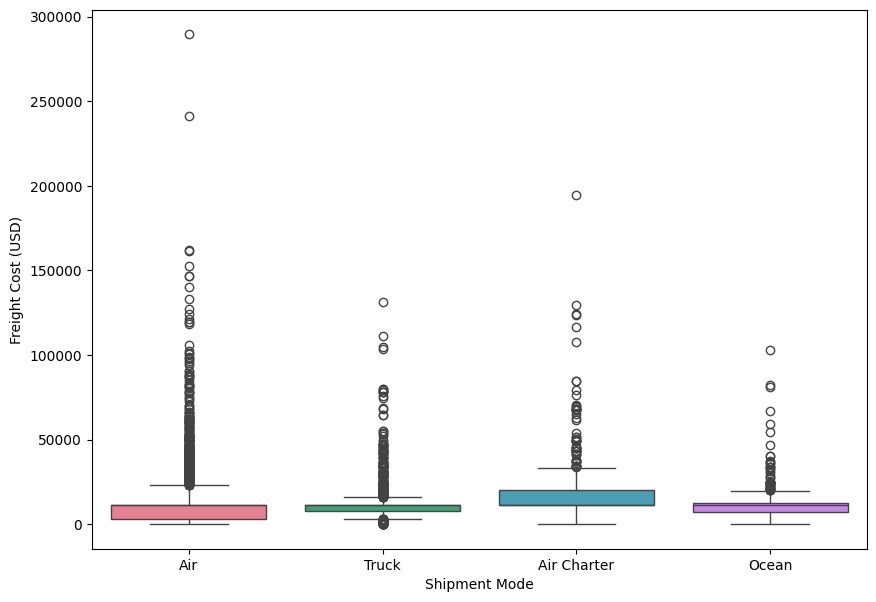

In [29]:
# Define a custom color palette
shipment_modes = df['Shipment Mode'].unique()
colors = sns.color_palette('husl', len(shipment_modes))
color_palette = dict(zip(shipment_modes, colors))

fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(x='Shipment Mode', y='Freight Cost (USD)', data=df, ax=ax, palette=color_palette)
plt.show()

<Axes: ylabel='Vendor'>

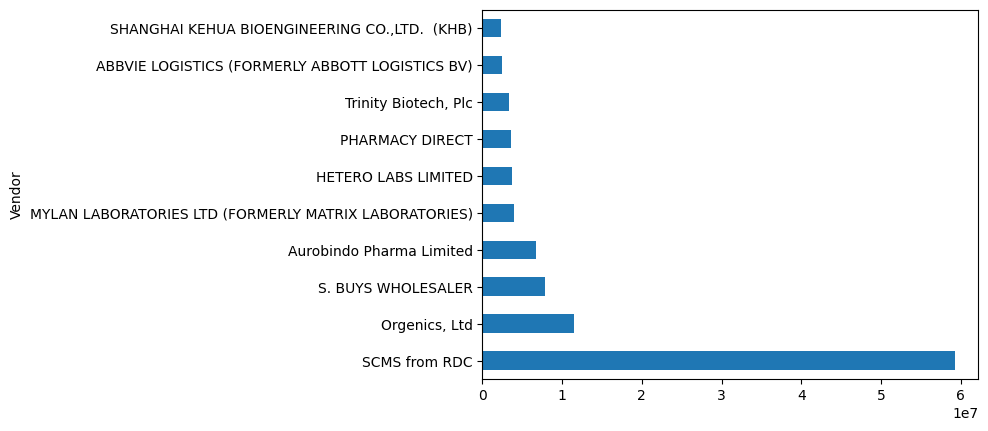

In [30]:
df.groupby('Vendor')['Freight Cost (USD)'].sum().sort_values(ascending=False).head(10).plot.barh()

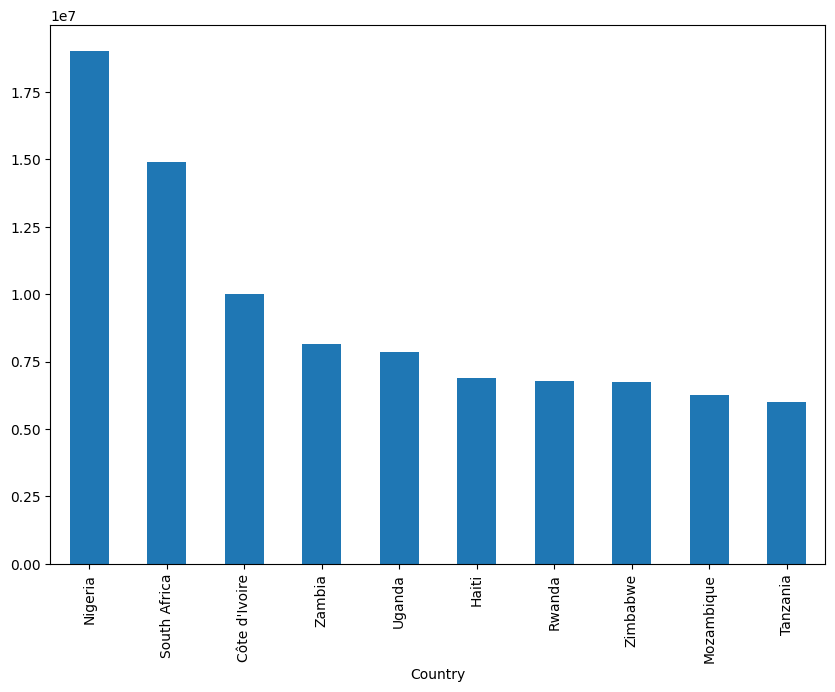

In [31]:
fig, ax = plt.subplots(figsize=(10,7))
df.groupby('Country')['Freight Cost (USD)'].sum().sort_values(ascending=False).head(10).plot.bar(ax=ax);

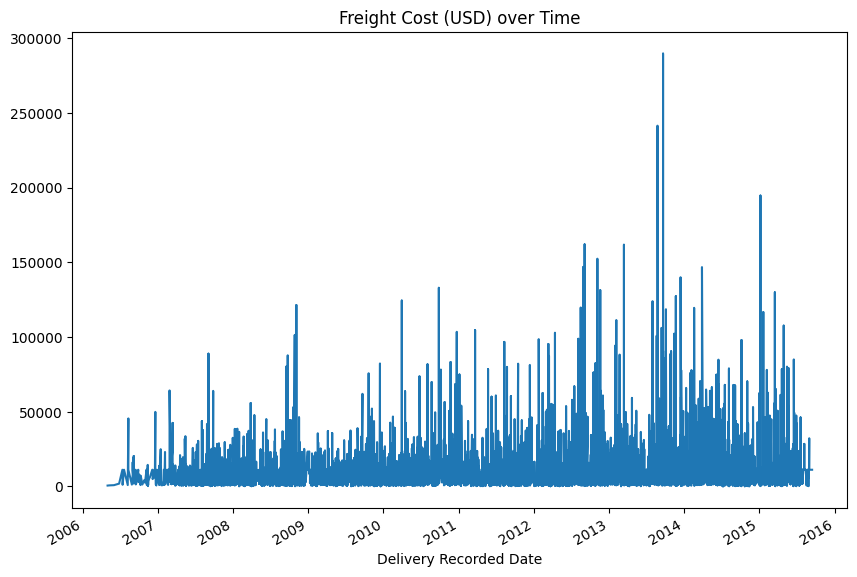

In [32]:
dt = df.set_index('Delivery Recorded Date')['Freight Cost (USD)']
fig, ax = plt.subplots(figsize=(10,7))
dt.plot(title='Freight Cost (USD) over Time');

<Axes: xlabel='Delivery Recorded Date', ylabel='Freight Cost (USD)'>

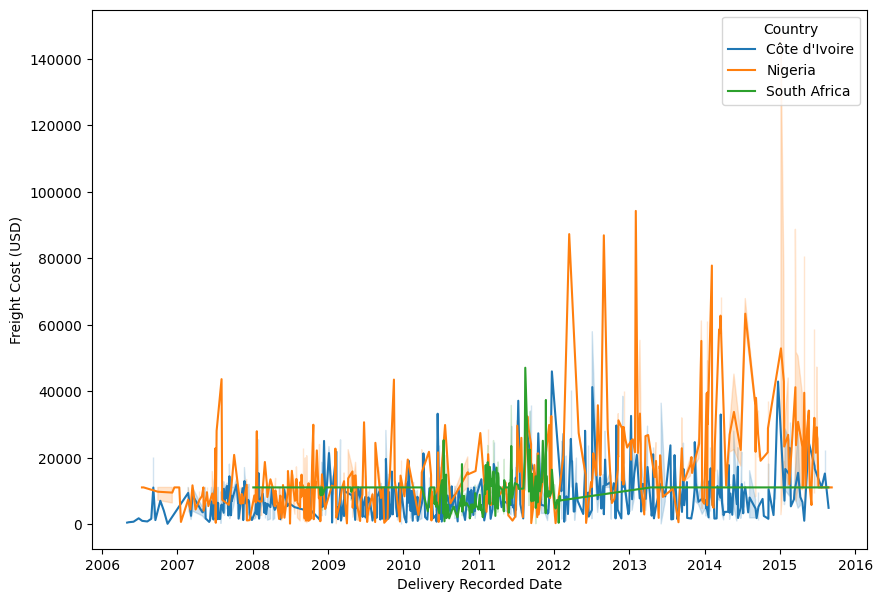

In [ ]:
dtc = df[df['Country'].isin(df['Country'].value_counts().head(3).index)]
dtc = dtc.set_index('Delivery Recorded Date')[['Freight Cost (USD)','Country']]
fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(x='Delivery Recorded Date',y='Freight Cost (USD)',data=dtc.reset_index(),hue='Country')

# Feature engineer and Feature extraction

In [73]:
# Drop columns w/o relevant info from analysis
df.drop(['ID','PO / SO #','ASN/DN #','PQ #'],axis=1,inplace=True)

In [74]:
# Identify number of categorical features
no=0
for d in df.columns:
    if(df[d].dtype == 'O'):
        no+=df[d].nunique()
        print(d,': ', df[d].nunique())
        print(no)

Project Code :  142
142
Country :  43
185
Managed By :  4
189
Fulfill Via :  2
191
Vendor INCO Term :  8
199
Shipment Mode :  4
203
Product Group :  5
208
Sub Classification :  6
214
Vendor :  73
287
Item Description :  184
471
Molecule/Test Type :  86
557
Brand :  48
605
Dosage :  54
659
Dosage Form :  17
676
Manufacturing Site :  88
764
First Line Designation :  2
766
Delivery Period :  113
879


In [75]:
df.dtypes

Project Code                            object
Country                                 object
Managed By                              object
Fulfill Via                             object
Vendor INCO Term                        object
Shipment Mode                           object
PQ First Sent to Client Date    datetime64[ns]
PO Sent to Vendor Date          datetime64[ns]
Scheduled Delivery Date         datetime64[ns]
Delivered to Client Date        datetime64[ns]
Delivery Recorded Date          datetime64[ns]
Product Group                           object
Sub Classification                      object
Vendor                                  object
Item Description                        object
Molecule/Test Type                      object
Brand                                   object
Dosage                                  object
Dosage Form                             object
Unit of Measure (Per Pack)               int64
Line Item Quantity                       int64
Line Item Val

In [76]:
# Separate DataFrame for object columns
df_obj = df.select_dtypes(include=['object'])

nums = df.select_dtypes(include = 'float64')
dt=df.select_dtypes(include=['datetime64[ns]'])

## seperate datetime on different columns for Year, Month, Day

In [77]:
for col in dt.columns:
    dt[col+' day'] = pd.DatetimeIndex(dt[col]).day
    dt[col+' month'] = pd.DatetimeIndex(dt[col]).month
    dt[col+' year'] = pd.DatetimeIndex(dt[col]).year
    dt.drop(col,axis=1,inplace=True)

## Encode categorical features with one-hot-encoder

In [78]:
df_obj

,Project Code,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Manufacturing Site,First Line Designation,Delivery Period
0,100-CI-T01,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,Ranbaxy Fine Chemicals LTD,Yes,200606
1,108-VN-T01,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,"Aurobindo Unit III, India",Yes,200611
2,100-CI-T01,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,ABBVIE GmbH & Co.KG Wiesbaden,Yes,200608
3,108-VN-T01,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,"Ranbaxy, Paonta Shahib, India",Yes,200609
4,108-VN-T01,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,"Aurobindo Unit III, India",Yes,200608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,103-ZW-T30,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,ARV,Pediatric,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",Lamivudine/Nevirapine/Zidovudine,Generic,30/50/60mg,Chewable/dispersible tablet - FDC,"Mylan, H-12 & H-13, India",No,201507
10320,104-CI-T30,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,Hetero Unit III Hyderabad IN,No,201508
10321,110-ZM-T30,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,ARV,Adult,SCMS from RDC,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Generic,600/300/300mg,Tablet - FDC,Cipla Ltd A-42 MIDC Mahar. IN,No,201509
10322,200-ZW-T30,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,Mylan (formerly Matrix) Nashik,Yes,201508


In [79]:
df_obj = pd.get_dummies(df_obj,sparse=False)
# Convert boolean columns to integers
df_obj = df_obj.astype({col: 'int' for col in df_obj if df_obj[col].dtype == 'bool'})

In [80]:
df_obj

,Project Code_100-BJ-T30,Project Code_100-BW-T01,Project Code_100-BZ-T30,Project Code_100-CI-T01,Project Code_100-DO-T30,Project Code_100-GH-T01,Project Code_100-GH-T30,Project Code_100-GN-T30,Project Code_100-HT-T01,Project Code_100-KZ-T01,...,Delivery Period_201412,Delivery Period_201501,Delivery Period_201502,Delivery Period_201503,Delivery Period_201504,Delivery Period_201505,Delivery Period_201506,Delivery Period_201507,Delivery Period_201508,Delivery Period_201509
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Normalize all numerical values for better model performance

In [81]:
from sklearn.preprocessing import normalize

for col in nums.columns:
    nums[col]=(nums[col]-nums[col].min())/(nums[col].max()-nums[col].min())

In [82]:
nums

,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,0.000093,0.021551,0.004065,0.000014,0.002691,0.000000
1,0.001042,0.004607,0.000126,0.000416,0.015607,0.000000
2,0.006720,0.059451,0.003352,0.000198,0.005707,0.000000
3,0.021398,0.002965,0.000293,0.002162,0.055260,0.000000
4,0.020430,0.002378,0.000210,0.008852,0.156910,0.000000
...,...,...,...,...,...,...
10319,0.100749,0.002675,0.000251,0.003994,0.038330,0.091561
10320,0.023083,0.004845,0.000461,0.003994,0.038330,0.020978
10321,0.863596,0.007424,0.001383,0.003994,0.038330,0.685488
10322,0.019132,0.004845,0.000461,0.001622,0.038330,0.017387


<ipython-input-85-7bf2ae7a52fc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nums['Line Item Value'])


<Axes: xlabel='Line Item Value', ylabel='Density'>

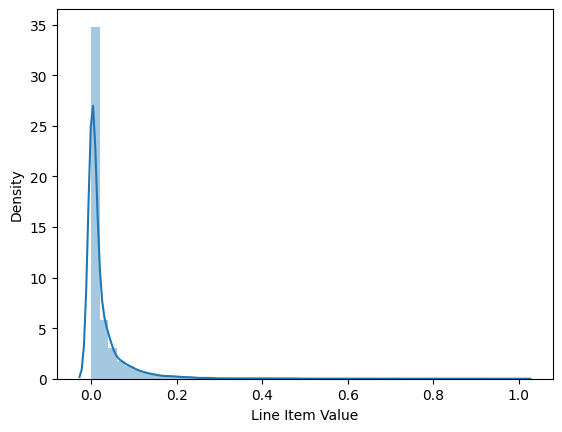

In [85]:
sns.distplot(nums['Line Item Value'])

In [83]:
df["Line Item Value"] = np.log(df["Line Item Value"] + 1)

In [84]:
for col in nums.columns:
    print(df[col].dtypes)

float64
float64
float64
float64
float64
float64


In [86]:
# Apply Log + 1 transformation to normalize skewed data while accounting for zeros.
for col in nums.columns:
    nums[col] = np.log(nums[col]+1)

<ipython-input-87-bbbfe8eec2be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Line Item Value']);


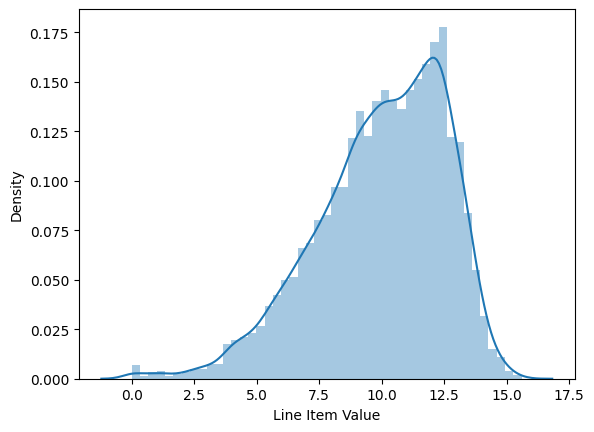

In [87]:
sns.distplot(df['Line Item Value']);

In [88]:
New_df = pd.concat([df["Schedule v Actual"],df_obj, nums,dt], axis=1)

In [89]:
New_df.columns

Index(['Schedule v Actual', 'Project Code_100-BJ-T30',
       'Project Code_100-BW-T01', 'Project Code_100-BZ-T30',
       'Project Code_100-CI-T01', 'Project Code_100-DO-T30',
       'Project Code_100-GH-T01', 'Project Code_100-GH-T30',
       'Project Code_100-GN-T30', 'Project Code_100-HT-T01',
       ...
       'PO Sent to Vendor Date year', 'Scheduled Delivery Date day',
       'Scheduled Delivery Date month', 'Scheduled Delivery Date year',
       'Delivered to Client Date day', 'Delivered to Client Date month',
       'Delivered to Client Date year', 'Delivery Recorded Date day',
       'Delivery Recorded Date month', 'Delivery Recorded Date year'],
      dtype='object', length=901)

In [90]:
for col in df_obj.columns:
    New_df[col]=New_df[col].fillna(0)


In [91]:
New_df.isna().sum()

Schedule v Actual                 0
Project Code_100-BJ-T30           0
Project Code_100-BW-T01           0
Project Code_100-BZ-T30           0
Project Code_100-CI-T01           0
                                 ..
Delivered to Client Date month    0
Delivered to Client Date year     0
Delivery Recorded Date day        0
Delivery Recorded Date month      0
Delivery Recorded Date year       0
Length: 901, dtype: int64

In [92]:
New_df=New_df.fillna(0)

In [93]:
New_df['PQ First Sent to Client Date day'].isna().sum()

0

In [94]:
New_df


,Schedule v Actual,Project Code_100-BJ-T30,Project Code_100-BW-T01,Project Code_100-BZ-T30,Project Code_100-CI-T01,Project Code_100-DO-T30,Project Code_100-GH-T01,Project Code_100-GH-T30,Project Code_100-GN-T30,Project Code_100-HT-T01,...,PO Sent to Vendor Date year,Scheduled Delivery Date day,Scheduled Delivery Date month,Scheduled Delivery Date year,Delivered to Client Date day,Delivered to Client Date month,Delivered to Client Date year,Delivery Recorded Date day,Delivery Recorded Date month,Delivery Recorded Date year
0,0,0,0,0,1,0,0,0,0,0,...,0.0,2,6,2006,2,6,2006,2,6,2006
1,0,0,0,0,0,0,0,0,0,0,...,0.0,14,11,2006,14,11,2006,14,11,2006
2,0,0,0,0,1,0,0,0,0,0,...,0.0,27,8,2006,27,8,2006,27,8,2006
3,0,0,0,0,0,0,0,0,0,0,...,0.0,1,9,2006,1,9,2006,1,9,2006
4,0,0,0,0,0,0,0,0,0,0,...,0.0,11,8,2006,11,8,2006,11,8,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,11,0,0,0,0,0,0,0,0,0,...,0.0,31,7,2015,15,7,2015,20,7,2015
10320,-7,0,0,0,0,0,0,0,0,0,...,0.0,31,7,2015,6,8,2015,7,8,2015
10321,-3,0,0,0,0,0,0,0,0,0,...,0.0,31,8,2015,25,8,2015,3,9,2015
10322,29,0,0,0,0,0,0,0,0,0,...,0.0,9,9,2015,4,8,2015,11,8,2015


# Build Model

In [95]:
X_bench = New_df.drop('Schedule v Actual',axis=1)
y_bench = New_df['Schedule v Actual']

New_df['y_bench_pred'] = 0

<ipython-input-95-072a6373eb0a>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  New_df['y_bench_pred'] = 0


In [96]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Establish Benchmark
rmse = sqrt(mean_squared_error(New_df['Schedule v Actual'], New_df['y_bench_pred']))
print('Benchmark MSE: %.3f' % rmse)

New_df.drop('y_bench_pred',axis=1,inplace=True)

Benchmark MSE: 29.221


In [97]:
from sklearn.model_selection import train_test_split

X = New_df.drop('Schedule v Actual',axis=1).values
y = New_df['Schedule v Actual'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('Training data contains %.0f records'%len(X_train))
print('Test data contains %.0f records'%len(X_test))

Training data contains 6917 records
Test data contains 3407 records


## Creating model for Delivery Date Prediction

In [98]:
X

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 6.000e+00,
        2.006e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.400e+01, 1.100e+01,
        2.006e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.700e+01, 8.000e+00,
        2.006e+03],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 3.000e+00, 9.000e+00,
        2.015e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.100e+01, 8.000e+00,
        2.015e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.100e+01, 8.000e+00,
        2.015e+03]])

In [99]:
#Create model for Delivery Date Prediction
from keras.models import Sequential
from keras.layers import Dense

def fit_model(nb_epoch, batch_size):
    model = Sequential()
    model.add(Dense(1024,input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # compile model
    model.compile(loss='mean_squared_error',optimizer='Adam')
    for i in range(nb_epoch):
        model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model

In [100]:
model = fit_model(200,256)

In [101]:
train_pred = model.predict(X_train)
train_mse = mean_squared_error(train_pred,y_train)
print('Training RMSE is %.2f' % sqrt(train_mse))

217/217 [==============================] - 1s 4ms/step
Training RMSE is 22.86


In [102]:
test_pred = model.predict(X_test)
test_mse = mean_squared_error(test_pred, y_test)
print('Test RMSE is %.2f' % sqrt(test_mse))

107/107 [==============================] - 1s 5ms/step
Test RMSE is 25.88


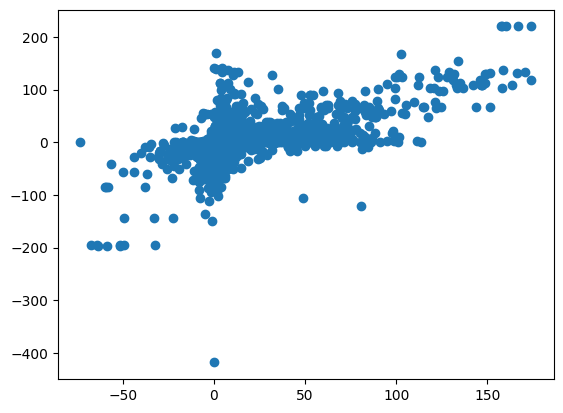

In [103]:
fig = plt.figure()
ax = plt.axes()
plt.scatter(test_pred,y_test)


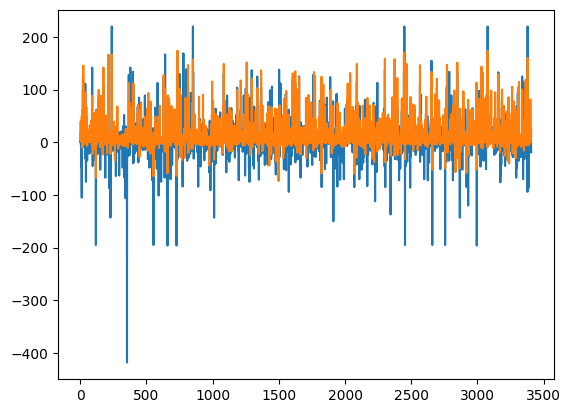

In [104]:
import matplotlib.pyplot as plt
plt.plot(y_test)
plt.plot(test_pred)
plt.show()

##  LSTM Forecasting

In [33]:
# Use LSTM to forecast freight costs per month

In [34]:
df['Delivery Period'] = df['Delivery Recorded Date'].copy()
df['Delivery Period'] = df['Delivery Period'].apply(lambda x: x.strftime('%Y%m'))

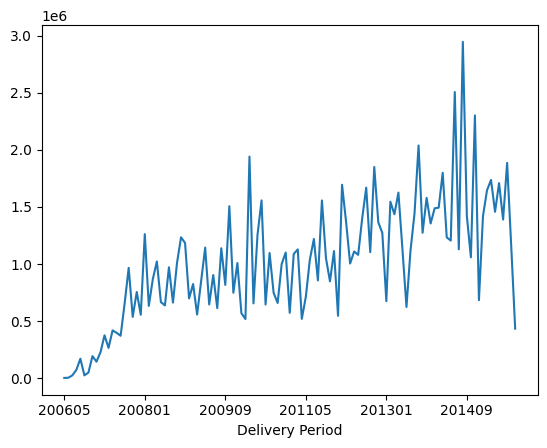

In [35]:
df.groupby(['Delivery Period'])['Freight Cost (USD)'].sum().plot();


In [36]:
fc_data = df.groupby(['Delivery Period'])['Freight Cost (USD)'].sum()

In [37]:
fc_data

Delivery Period
200605    1.149050e+03
200606    2.596910e+03
200607    2.324597e+04
200608    7.135705e+04
200609    1.696268e+05
              ...     
201505    1.708562e+06
201506    1.389209e+06
201507    1.885853e+06
201508    1.169057e+06
201509    4.330262e+05
Name: Freight Cost (USD), Length: 113, dtype: float64

### Check whether data stationary or not ?


In [38]:
from statsmodels.tsa.stattools import adfuller
#H0 is not stationary
#H1 is stationary
def adfuller_test(sales):
  result=adfuller(sales)
  labels= ["ADF teststatic", "P_value", "#lags Used", "Number of observation used "]
  for value,label in zip(result,labels):
    print(label,":",value)
  if result[1]<=0.05:
    print("Time series is stationary")
  else:
    print("Time series is non-stationary ")

In [39]:
adfuller_test(fc_data)

ADF teststatic : -2.579098483440487
P_value : 0.09739459030439995
#lags Used : 8
Number of observation used  : 104
Time series is non-stationary 


In [61]:
diff_values =fc_data-fc_data.shift(1)#because data is seasonal


In [62]:
diff_values .isna().sum()

1

In [63]:
diff_values =diff_values .dropna()

ADF teststatic : -4.389472931661494
P_value : 0.00030982823066948184
#lags Used : 8
Number of observation used  : 103
Time series is stationary


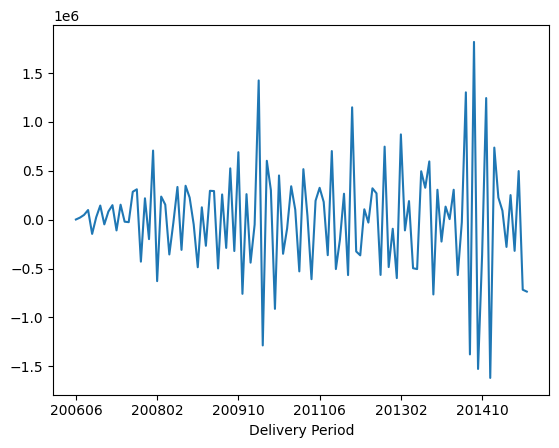

In [64]:
diff_values .plot()
adfuller_test(diff_values )

In [65]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional

# frame forecast sequence as supervised learning problem
def timeseries_to_supervised(data, lag=1):
    columns = [data.shift(i) for i in range(1, lag+1)]
    columns.append(data)
    df = pd.concat(columns, axis=1)
    df.fillna(0,inplace=True)
    return df



# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# scale data
def scale(train, test):
    scaler = MinMaxScaler(feature_range=(-1,1))
    scaler = scaler.fit(train)
    # Scale Training Data
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # Scale Test data
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = numpy.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

In [66]:
# Frame as supervised learning

supervised = timeseries_to_supervised(diff_values,1)
supervised_values = supervised.values

# Split to Train and Test sets
train, test = supervised_values[0:-25], supervised_values[-25:-1]

# Scale data
scaler, train_scaled, test_scaled = scale(train, test)

In [67]:
naive_pred = np.full((len(test),1), fc_data[0:-25].mean())

In [69]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# Establish Benchmark
# A naive forecast assumes that the future value will be the same as the most recent past value or a simple average of past values.
rmse = sqrt(mean_squared_error(fc_data.values[-25:-1], naive_pred))
print('Benchmark RMSE: %.3f' % rmse)

Benchmark RMSE: 861773.480


In [124]:
# Fit the LSTM model (already done)
lstm_model = fit_lstm(train_scaled, 1, 1000, 5)

# Forecast training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
train_predictions = lstm_model.predict(train_reshaped, batch_size=1)

87/87 [==============================] - 1s 1ms/step


In [126]:
import numpy

In [127]:
# Invert scaling for training predictions
train_predictions_inverted = [invert_scale(scaler, train_scaled[i, 0:-1], train_predictions[i, 0]) for i in range(len(train_predictions))]

# Invert differencing for training predictions
train_actual = fc_data.values[:len(train_predictions)]
train_predictions_final = [inverse_difference(train_actual, train_predictions_inverted[i], len(train_predictions) - i) for i in range(len(train_predictions_inverted))]

# Calculate RMSE for training data
train_rmse = sqrt(mean_squared_error(train_actual, train_predictions_final))
print('Training RMSE: %.3f' % train_rmse)

Training RMSE: 292287.380


1/1 [==============================] - 0s 25ms/step
Month=1, Predicted=1703944.384779, Expected=2038575
1/1 [==============================] - 0s 27ms/step
Month=2, Predicted=605382.382561, Expected=1273451
1/1 [==============================] - 0s 41ms/step
Month=3, Predicted=1752844.016877, Expected=1579075
1/1 [==============================] - 0s 24ms/step
Month=4, Predicted=1095551.143014, Expected=1354780
1/1 [==============================] - 0s 24ms/step
Month=5, Predicted=1520232.764581, Expected=1488075
1/1 [==============================] - 0s 25ms/step
Month=6, Predicted=1318622.999706, Expected=1493310
1/1 [==============================] - 0s 27ms/step
Month=7, Predicted=1690355.031206, Expected=1799026
1/1 [==============================] - 0s 45ms/step
Month=8, Predicted=871150.403462, Expected=1232597
1/1 [==============================] - 0s 30ms/step
Month=9, Predicted=1423864.846041, Expected=1204989
1/1 [==============================] - 0s 30ms/step
Month=10, Pred

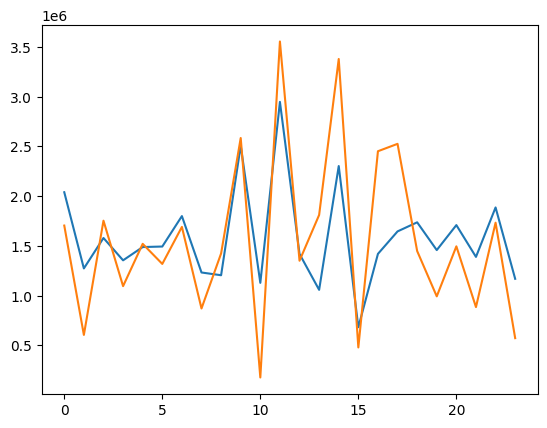

In [128]:
from math import sqrt
from matplotlib import pyplot
import numpy

# validatiion on test data
predictions = list()
for i in range(len(test_scaled)):
    # one step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i,-1]
    yhat = forecast_lstm(lstm_model,1,X)
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(fc_data.values, yhat, len(test_scaled)+1-i)
    # store forecast
    predictions.append(yhat)
    expected = fc_data.values[len(train) + i + 1]
    print('Month=%d, Predicted=%f, Expected=%i'% (i+1, yhat, expected))

rmse = sqrt(mean_squared_error(fc_data.values[-25:-1], predictions))
print('Test RMSE: %.3f' % rmse)

# plot observed vs forecasted
pyplot.plot(fc_data.values[-25:-1])
pyplot.plot(predictions)
pyplot.show()

## Summary of Findings

| **Model** | **Objective**                         | **Target Variable**        | **Model Architecture**          | **Performance Metric** | **Training RMSE** | **Test RMSE**      | **Benchmark RMSE** |
|-----------|---------------------------------------|----------------------------|---------------------------------|------------------------|-------------------|--------------------|--------------------|
| DNN       | Optimize delivery schedules           | Schedule v Actual          | Dense Neural Network (4 layers) | RMSE                   | 22.86             | 25.88              | 29.221            |
| LSTM      | Forecast monthly freight costs        | Freight Cost (USD)         | LSTM Network (1 LSTM layer)     | RMSE                   | 292287.380 | 529783.702       | 861773.480        |

### Key Points

- **DNN Model**:
  - **Objective**: To predict the deviation between scheduled and actual delivery times and optimize delivery schedules.
  - **Target Variable**: `Schedule v Actual`
  - **Model Performance**: Achieved a training RMSE of 22.86 and a test RMSE of 25.88. The naive benchmark RMSE was 29.221, indicating significant improvement.
  - **Architecture**: The model consists of four dense layers with ReLU activations.

- **LSTM Model**:
  - **Objective**: To forecast monthly freight costs for better financial planning and budgeting.
  - **Target Variable**: `Freight Cost (USD)`
  - **Model Performance**: Achieved a test RMSE of 529783.702. The naive benchmark RMSE was 861773.480, showing better performance than the naive prediction.
  - **Architecture**: The model includes one LSTM layer followed by a dense layer.

## ARIMA

In [121]:
!pip install pmdarima -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.6 MB/s eta 0:00:00


In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


In [47]:
df['Delivery Period'] = df['Delivery Recorded Date'].copy()
df['Delivery Period'] = df['Delivery Period'].apply(lambda x: x.strftime('%Y%m'))

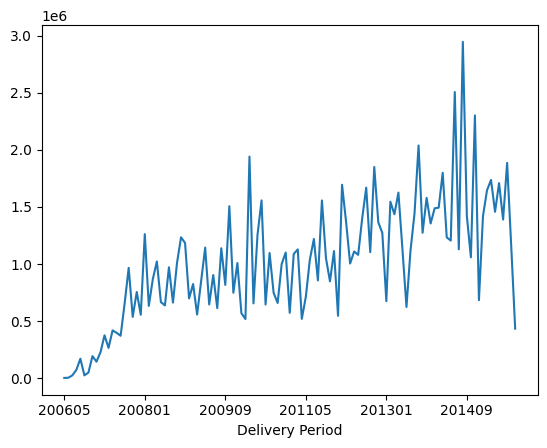

In [48]:
df.groupby(['Delivery Period'])['Freight Cost (USD)'].sum().plot();


In [49]:
fc_data = df.groupby(['Delivery Period'])['Freight Cost (USD)'].sum()

In [50]:
#check stationarity
from statsmodels.tsa.stattools import adfuller
#H0 is not stationary
#H1 is stationary
def adfuller_test(sales):
  result=adfuller(sales)
  labels= ["ADF teststatic", "P_value", "#lags Used", "Number of observation used "]
  for value,label in zip(result,labels):
    print(label,":",value)
  if result[1]<=0.05:
    print("Time series is stationary")
  else:
    print("Time series is non-stationary ")

In [51]:
adfuller_test(fc_data)

ADF teststatic : -2.579098483440487
P_value : 0.09739459030439995
#lags Used : 8
Number of observation used  : 104
Time series is non-stationary 


In [74]:
diff_values =fc_data-fc_data.shift(1)#because data is seasonal
diff_values=diff_values.dropna()

In [75]:
adfuller_test(diff_values)

ADF teststatic : -4.389472931661494
P_value : 0.00030982823066948184
#lags Used : 8
Number of observation used  : 103
Time series is stationary


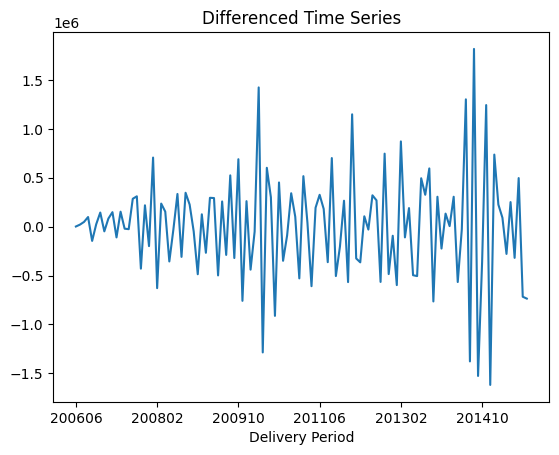

In [76]:
diff_values.plot()
plt.title('Differenced Time Series')
plt.show()


In [123]:
from pmdarima import auto_arima

# Assuming your differenced series is called 'diff_values'
model = auto_arima(fc_data, seasonal=True, stepwise=True, suppress_warnings=True)

# Print the model summary
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  113
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -1596.845
Date:                Tue, 09 Jul 2024   AIC                           3205.690
Time:                        02:42:13   BIC                           3222.001
Sample:                             0   HQIC                          3212.308
                                - 113                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.445e+04   1.88e+04      2.369      0.018    7671.130    8.12e+04
ar.L1         -1.1719      0.138     -8.501      0.000      -1.442      -0.902
ar.L2         -0.3674      0.113     -3.239      0.0

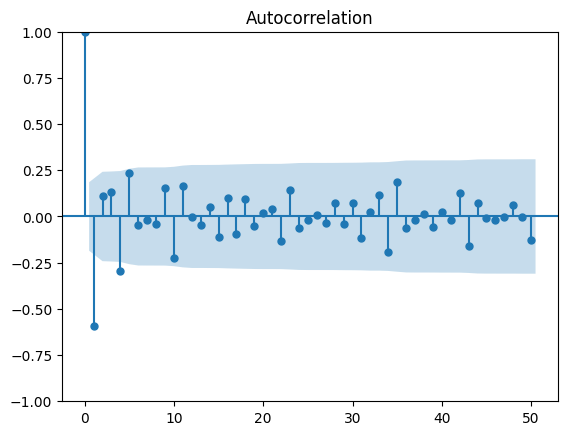

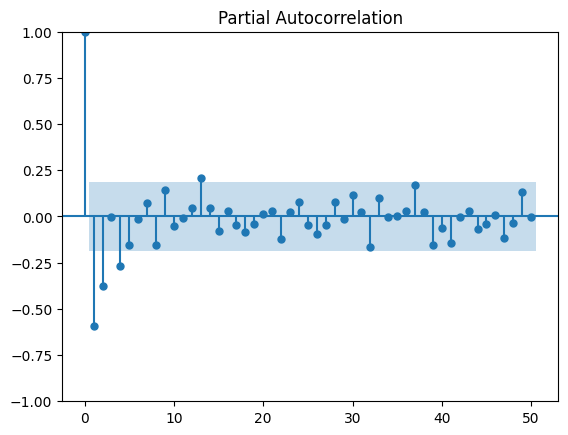

In [124]:
plot_acf(diff_values, lags=50)
plt.show()

plot_pacf(diff_values, lags=50)
plt.show()


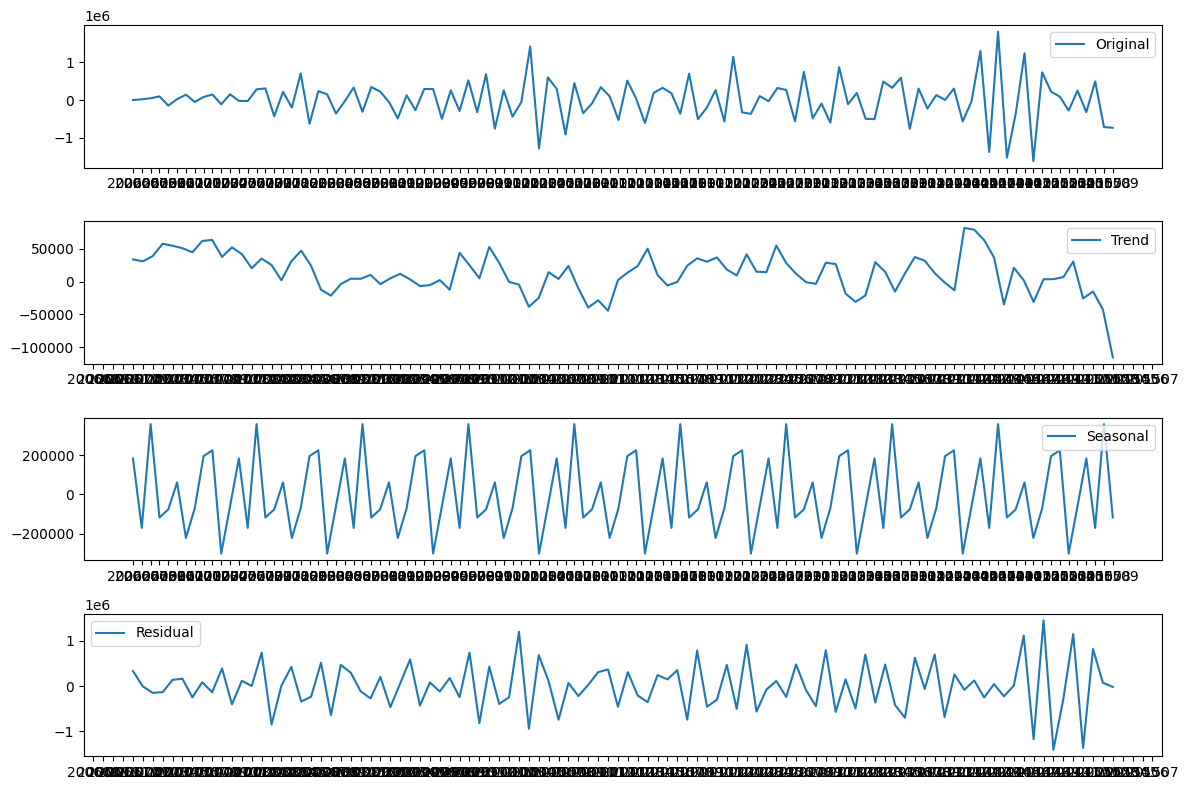

In [125]:
decomposition = seasonal_decompose(diff_values, period=12)  # Adjust the period based on your data frequency
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(diff_values, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


based on above it seams data is seasonal so instead of ARIMA we used SARIMAX

In [127]:
# Assuming your data is in a pandas Series called 'data'
train_size = int(len(fc_data) * 0.8)  # Use 80% of data for training
train = fc_data[:train_size]
test = fc_data[train_size:]

In [128]:
train

Delivery Period
200605    1.149050e+03
200606    2.596910e+03
200607    2.324597e+04
200608    7.135705e+04
200609    1.696268e+05
              ...     
201306    6.227671e+05
201307    1.117462e+06
201308    1.443212e+06
201309    2.038575e+06
201310    1.273451e+06
Name: Freight Cost (USD), Length: 90, dtype: float64

In [129]:
test

Delivery Period
201311    1.579076e+06
201312    1.354781e+06
201401    1.488076e+06
201402    1.493311e+06
201403    1.799026e+06
201404    1.232597e+06
201405    1.204989e+06
201406    2.506839e+06
201407    1.128512e+06
201408    2.946076e+06
201409    1.418962e+06
201410    1.058277e+06
201411    2.301600e+06
201412    6.827726e+05
201501    1.419596e+06
201502    1.645272e+06
201503    1.736545e+06
201504    1.457537e+06
201505    1.708562e+06
201506    1.389209e+06
201507    1.885853e+06
201508    1.169057e+06
201509    4.330262e+05
Name: Freight Cost (USD), dtype: float64

In [132]:
model = ARIMA(train, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local

                               SARIMAX Results                                
Dep. Variable:     Freight Cost (USD)   No. Observations:                   90
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1256.690
Date:                Tue, 09 Jul 2024   AIC                           2523.380
Time:                        02:49:37   BIC                           2535.823
Sample:                             0   HQIC                          2528.395
                                 - 90                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7265      0.216      3.367      0.001       0.304       1.149
ar.L2         -0.0593      0.170     -0.349      0.727      -0.392       0.273
ma.L1         -1.6851      0.176     -9.566      0.0

In [133]:
# Forecast for the test period
forecast = model_fit.forecast(steps=len(test))

# Generate in-sample predictions for the training data
in_sample_pred = model_fit.get_prediction(start=train.index[0], end=train.index[-1])
in_sample_mean = in_sample_pred.predicted_mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


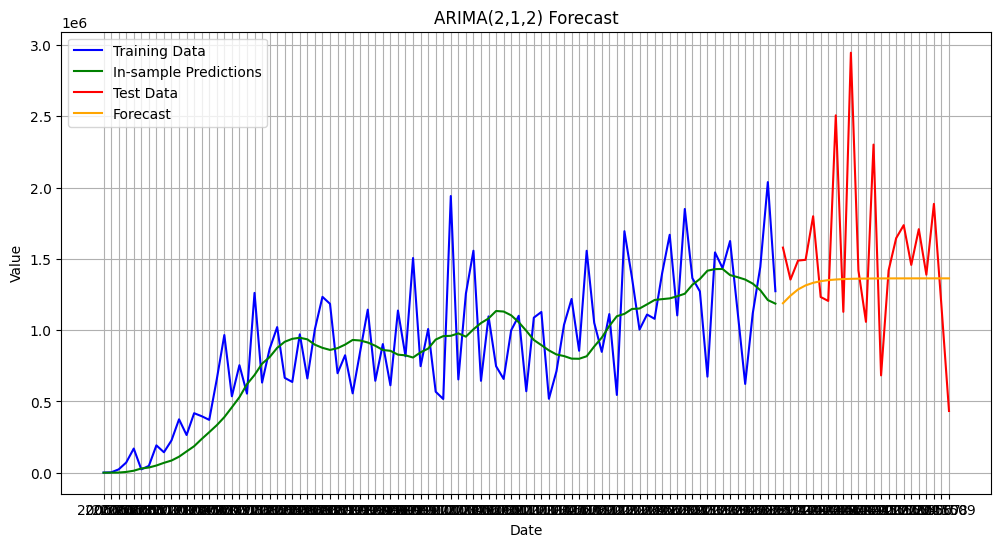

In [134]:
plt.figure(figsize=(12,6))

# Plot training data
plt.plot(train.index, train, label='Training Data', color='blue')

# Plot in-sample predictions
plt.plot(in_sample_mean.index, in_sample_mean, label='In-sample Predictions', color='green')

# Plot test data
plt.plot(test.index, test, label='Test Data', color='red')

# Plot forecast
plt.plot(test.index, forecast, label='Forecast', color='orange')

plt.title('ARIMA(2,1,2) Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [140]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for training set
train_rmse = np.sqrt(mean_squared_error(train, in_sample_mean))

# Calculate RMSE for test set
test_rmse = np.sqrt(mean_squared_error(test, forecast))

print(f'Training RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Training RMSE: 323737.56837800634
Test RMSE: 565322.2278463151


In [141]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

test_mse = mean_squared_error(test, forecast)
test_rmse = np.sqrt(test_mse)

print(f'Root Mean Squared Error: {test_rmse}')


Root Mean Squared Error: 565322.2278463151
